In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import re
import hashlib
import numpy as np
from matplotlib import rc
from ProjectAnalysis import ProjectAnalysis

In [2]:
common_errors = [
    ('POM_ERROR','Non-resolvable parent POM'),
    ('POM_ERROR','\[ERROR\] (.+)\n(.+)'),
    ('NO_POM_ERROR','there is no POM in this directory'),
    ('ENCODING_ERROR','unmappable character for encoding UTF8'),
    ('JAVA_ERROR','error: (.+)\n(.+)'),
]
pa = ProjectAnalysis("Lang",  "../Lang/step_2/%s", "report_step_1.csv")

In [3]:
pa.df().head()

,id,commit,build,exec_time,comment,fix,lastFix
0,0,687b2e6,SUCCESS,9.0,LANG-747 NumberUtils does not handle Long Hex ...,{'lastFix': None},NaN
1,1,2c454a4,SUCCESS,8.0,LANG-837 Add ObjectUtils.toIdentityString meth...,{'lastFix': None},NaN
2,2,47d5974,SUCCESS,8.0,short circuit (un)capitalize if string is alre...,{'lastFix': None},NaN
3,3,6b5acb4,SUCCESS,8.0,Add tests for new Javadoc examples,{'lastFix': None},NaN
4,4,de63ae7,SUCCESS,8.0,Clarify Javadoc,{'lastFix': None},NaN


## Calculate the number of builds of each type

In [4]:
pa.df()[(pa.df()['build'] == 'SUCCESS')].count()

id           1822
commit       1822
build        1822
exec_time    1822
comment      1822
fix          1822
lastFix         0
dtype: int64

In [5]:
pa.df()[(pa.df()['build'] == 'FAIL')].count()

id           1178
commit       1178
build        1178
exec_time    1178
comment      1178
fix          1178
lastFix         0
dtype: int64

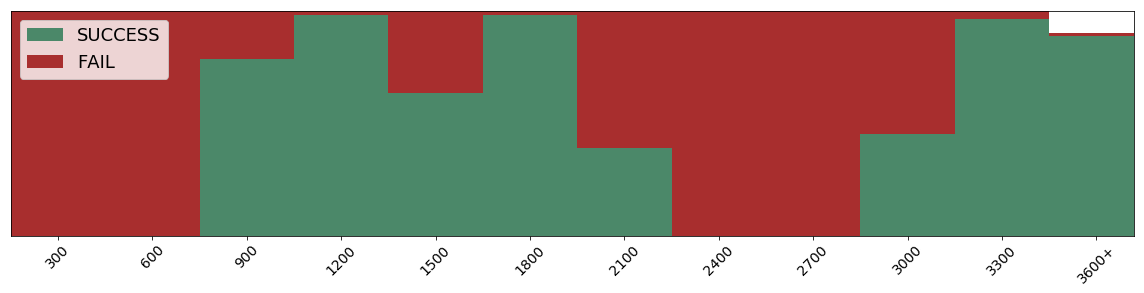

In [6]:
pa.plot_and_save_histogram(300)

## Recogemos todos los fails, los separamos en grupos y obtenemos los logs de cada commit con build fail

In [7]:
fails, groups_of_fails = pa.get_fails_and_grouped_fails()

## Agrupamos los commits por sus logs

In [8]:
errors = pa.group_errors_by_log(fails, common_errors)

In [9]:
df = pd.DataFrame.from_dict(errors, orient='index')
df.groupby(['type']).agg({'count': 'sum'})

,count
type,
JAVA_ERROR,323
UNKNOWN_ERROR,855


In [10]:
df.groupby(['key','type','message']).agg({'count': 'sum'}).sort_values(by=['count'], ascending=False)

,,,count
key,type,message,
90e1ee698db79d515772fc2debfc7851,UNKNOWN_ERROR,Buildfile: build.xml does not exist! Build failed Buildfile: build.xml does not exist! Build failed,826
5395ee2fba90bc797f9ed80e4f51e53c,JAVA_ERROR,error: no suitable method found for append(char[]) [javac] append(cbuf);,105
e99b573825e96596de2d0d1b10fdd70e,JAVA_ERROR,"error: unmappable character for encoding ASCII [javac] {""copy"", ""169""}, // ? - copyright sign",91
2318fdf879152ce2bae416d2ed9a7ba2,JAVA_ERROR,error: annotations are not supported in -source 1.3 [javac] @Override,60
277b12d4c429adda696d2bc5e4c6f1e1,JAVA_ERROR,error: generics are not supported in -source 1.3 [javac] public static final Class<?>[] EMPTY_CLASS_ARRAY = new Class[0];,51
fbc2641451dab38c322a10a2da815348,JAVA_ERROR,error: cannot find symbol [javac] import org.apache.commons.collections.comparators.BooleanComparator;,6
4eef6bdc319f0fcf714175f9a8785efb,JAVA_ERROR,"error: no suitable method found for format(long,String,boolean) [javac] return format(millis, format, true);",2
604b55332fb9cb348b4338f1bea8d042,UNKNOWN_ERROR,Buildfile: /home/ubuntu/bugs/projects/Lang/build.xml clean: BUILD SUCCESSFUL Total time: 0 seconds Buildfile: /home/ubuntu/bugs/projects/Lang/build.xml,2
de367beeb5db832f60b76d75add16442,JAVA_ERROR,error: IDKey is not public in org.apache.commons.lang; cannot be accessed from outside package [javac] import org.apache.commons.lang.IDKey;,2


In [11]:
pa.view_log_by_hash(errors,'548116871373715cad09676c7d092a11', 0)

KeyError: '548116871373715cad09676c7d092a11'

In [ ]:
pa.save_success_commits()